## Load libraries

In [4]:
# Libraries to work with dataset
import numpy as np
import pandas as pd

# Libraries to cluster data
from sklearn.cluster import KMeans
# from sklearn.cluster import MiniBatchKMeans

# Libraries to visualize data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# Libraries for evaluation
from sklearn import metrics
from pyclustertend import hopkins
from sklearn.preprocessing import scale

%matplotlib inline

## Configurate and declare global variables

In [5]:
BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

## Import data

In [6]:
title_embeddings = np.load(OUTPUT_DIR + "title_embeddings.npy")
title_docs = pd.read_csv(OUTPUT_DIR + "title_docs.csv")

## Check imported data

In [30]:
title_embeddings.shape, title_docs.shape

((18992, 100), (18992, 2))

## Clustering data

### K-means

In [7]:
# def mbkmeans_clusters(X, k, mb, print_silhouette_values, draw_plot):
def kmeans_clusters(X, k, print_silhouette_values, draw_plot):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.
        draw_plot: Draw Silhouette plot and Cluster plot

    Returns:
        Trained clustering model and labels based on X.
    """
    km = KMeans(n_clusters=k, random_state=6886).fit(X)
#     km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)

    silhouette_score = metrics.silhouette_score(X, km.labels_)

    print(f"Number of clusters (k) = {k}")
    print(f"Silhouette coefficient: {silhouette_score:0.2f}")
    print(f"Inertia: {km.inertia_}")

    if draw_plot or print_silhouette_values:
        # Calculate Silhouette scores
        sample_silhouette_values = metrics.silhouette_samples(X, km.labels_)
        silhouette_values = []

    if draw_plot:
        y_lower = 10

    if draw_plot:
        # Drawing silhouette plot
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (k + 1) * 10])
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_score, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    if draw_plot or print_silhouette_values:
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]

            if print_silhouette_values:
                silhouette_values.append(
                    (
                        i,
                        cluster_silhouette_values.shape[0],
                        cluster_silhouette_values.mean(),
                        cluster_silhouette_values.min(),
                        cluster_silhouette_values.max(),
                    )
                )

            if draw_plot:
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                # ith_cluster_silhouette_values = \
                #    sample_silhouette_values[cluster_labels == i]

                cluster_silhouette_values.sort()

                size_cluster_i = cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / k)
                ax1.fill_betweenx(
                    np.arange(y_lower, y_upper),
                    0,
                    cluster_silhouette_values,
                    facecolor=color,
                    edgecolor=color,
                    alpha=0.7,
                )

                # Label the silhouette plots with their cluster numbers at the middle
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

                # Compute the new y_lower for next plot
                y_lower = y_upper + 10  # 10 for the 0 samples

    if draw_plot:
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = km.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("")
        ax2.set_ylabel("")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data"
                      "with n_clusters = %d" % k),
                     fontsize=14, fontweight='bold')

    if print_silhouette_values:
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        print("Silhouette values:")
        for s in silhouette_values:
            print(
                f"Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )

    print("==========================")
    return km, km.labels_, silhouette_score, km.inertia_

In [ ]:
sum_of_squared_distances = []
silho_scores = []
km_list = []
km_labels = []
k_range = range(2, 101)

for k in k_range:
    clustering, cluster_labels, sil_score, inertia = kmeans_clusters(
        X=title_embeddings,
        k=k,
#         mb=500,
        print_silhouette_values=False,
        draw_plot=False
    )
    km_list.append(clustering)
    km_labels.append(cluster_labels)
    sum_of_squared_distances.append(inertia)
    silho_scores.append(sil_score)

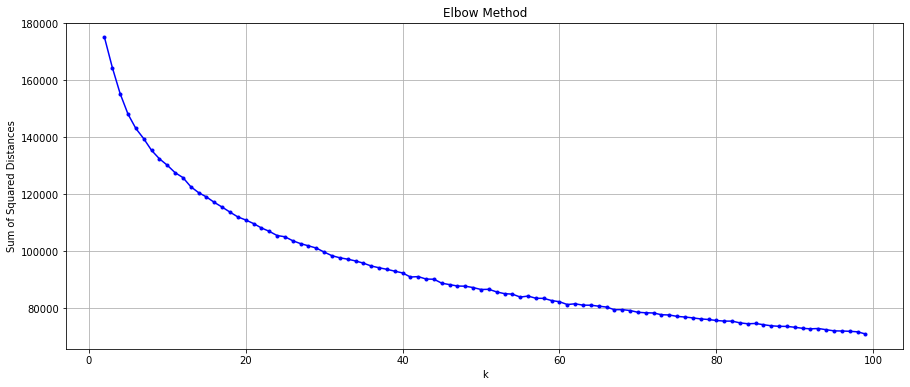

In [85]:
plt.figure(figsize=(15, 6))
plt.plot(k_range, sum_of_squared_distances, "b.-")
plt.xlabel("k")
# plt.xticks(ticks=k_range, labels=k_range)
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.grid()
plt.show()

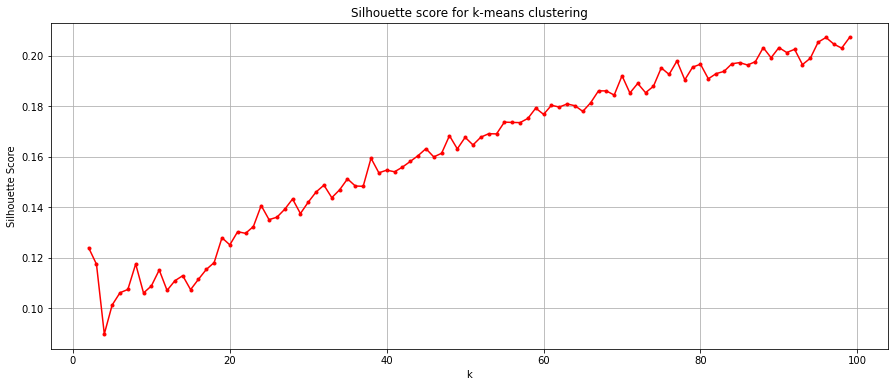

In [86]:
plt.figure(figsize=(15, 6))
plt.plot(k_range, silho_scores, "r.-")
plt.xlabel("k")
# plt.xticks(ticks=k_range, labels=k_range)
plt.ylabel("Silhouette Score")
plt.title("Silhouette score for k-means clustering")
plt.grid()
plt.show()

In [87]:
df_clusters = pd.DataFrame(
    {
        "text": title_docs["job_title"].values.tolist(),
        "tokens": title_docs["clean_job_title"].values.tolist(),
        "cluster": km_labels[-1]
    }
)

In [88]:
df_clusters

,text,tokens,cluster
0,Chief Financial Officer,"['chief', 'financial', 'officer']",67
1,Full-time Community Connections Intern (paid i...,"['full', 'time', 'community', 'connection', 'i...",12
2,Country Coordinator,"['country', 'coordinator']",34
3,BCC Specialist,"['bcc', 'specialist']",7
4,Software Developer,"['software', 'developer']",75
...,...,...,...
18987,Senior Creative UX/ UI Designer,"['senior', 'creative', 'ux', 'ui', 'designer']",80
18988,Category Development Manager,"['category', 'development', 'manager']",47
18989,Operational Marketing Manager,"['operational', 'marketing', 'manager']",88
18990,Head of Online Sales Department,"['head', 'online', 'sale', 'department']",54


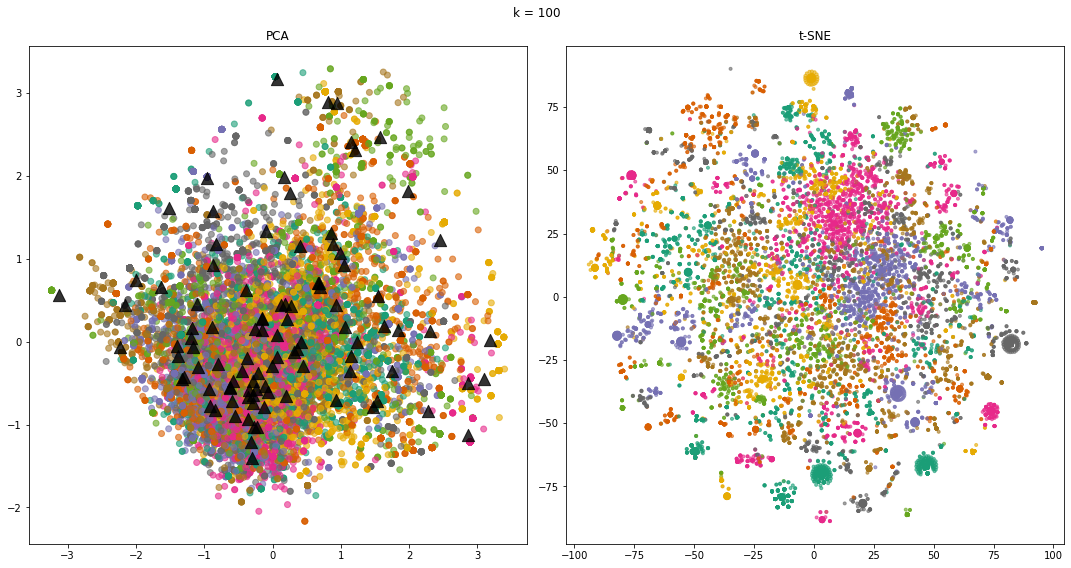

In [11]:
X = title_embeddings
labels = km_labels[-1]
centroids = km_list[-1].cluster_centers_
k = list(k_range)[-1]
palette = sns.color_palette("Dark2", as_cmap=True)

# Visualize clusters by PCA
pca = PCA(n_components=2, random_state=6886).fit(X)
datapoint = pca.transform(X)
centroidpoint = pca.transform(centroids)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
fig.suptitle("k = " + str(k))
ax1.set_title("PCA")
ax1.scatter(datapoint[:, 0], datapoint[:, 1], c=labels, alpha=0.6, cmap=palette)
ax1.scatter(
    centroidpoint[:, 0], centroidpoint[:, 1], marker="^", alpha=0.8, s=150, c="#000000"
)

# Visualize clusters by t-SNE
tsne = TSNE(n_components=2, random_state=6886)
tsne_datapoint = tsne.fit_transform(X)

ax2.set_title("t-SNE")
ax2.scatter(
    tsne_datapoint[:, 0],
    tsne_datapoint[:, 1],
    marker=".",
    c=labels,
    alpha=0.6,
    cmap=palette,
)
plt.tight_layout()

In [12]:
# Test the cluster tendency of data
hopkins(X, X.shape[0])

0.0645206808611538

In [15]:
X_scaled = scale(X)

In [16]:
hopkins(X_scaled, X_scaled.shape[0])

0.06442179934497434

In [ ]:
# from pyclustertend import vat

# # Visualize the cluster tendency
# vat(X_scaled)